Group 12

Anakha Krishnavilasom Gopalakrishnan -  8 hours

Daniel Juster - 8 hours

# **A**

**Task**

Write a Python program that draws a scatter plot of GDP per capita vs life
expectancy.

State any assumptions and motivate decisions that you make when selecting data to be plotted, and in combining data.


**Assumptions** 

We assume that we will find a correlation between GDP and life expectancy, regardless of country.
We also assume that we will need to test the scatter-plotting a bit until we get it right.
Further, we assume that the list of countries are correct and that they are the same for both files we download. (later, we will see that this is not the case. E.g. some countries are missing, continents like Africa are listed…)

**Decisions**

We decide to import two files, everything to see how it works.
We decide on the following layout:

y-axis = life expectancy

x-axis = GDP


In [276]:
# Importing librarties

import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [277]:
# Importing a lot of data

# Import gdp data
file_path = "/content/drive/MyDrive/test/gdp-per-capita-maddison-2020.csv"

gdpDataCapita = pd.read_csv(file_path)
print(gdpDataCapita)


# Import Life exp
filee_path = "/content/drive/MyDrive/test/life-expectancy.csv"

LifeExpectData = pd.read_csv(filee_path)


            Entity Code  Year  GDP per capita 417485-annotations
0      Afghanistan  AFG  1950       1156.0000                NaN
1      Afghanistan  AFG  1951       1170.0000                NaN
2      Afghanistan  AFG  1952       1189.0000                NaN
3      Afghanistan  AFG  1953       1240.0000                NaN
4      Afghanistan  AFG  1954       1245.0000                NaN
...            ...  ...   ...             ...                ...
19871     Zimbabwe  ZWE  2014       1594.0000                NaN
19872     Zimbabwe  ZWE  2015       1560.0000                NaN
19873     Zimbabwe  ZWE  2016       1534.0000                NaN
19874     Zimbabwe  ZWE  2017       1582.3662                NaN
19875     Zimbabwe  ZWE  2018       1611.4052                NaN

[19876 rows x 5 columns]


In [278]:
# We will get too much data. The scatter-plotting will be all blue, so we need to narrow down. We select 1980 only.
gdpDataCapita = gdpDataCapita[gdpDataCapita['Year'] == 1980]
LifeExpectData = LifeExpectData[LifeExpectData['Year'] == 1980]


In [279]:
# Now we need to merge the data-sets and remove what we do not need. We keep Entity (country), Life expectency and GDP.

MergedData = pd.merge(LifeExpectData[['Entity', 'Life expectancy at birth (historical)']], gdpDataCapita[['Entity', 'GDP per capita']], on ='Entity')

# Check that the data looks OK.
MergedData.head(5)


,Entity,Life expectancy at birth (historical),GDP per capita
0,Afghanistan,39.6,1019.0
1,Albania,70.5,3741.0
2,Algeria,53.3,5024.0
3,Angola,42.4,1532.0
4,Argentina,68.6,13080.0


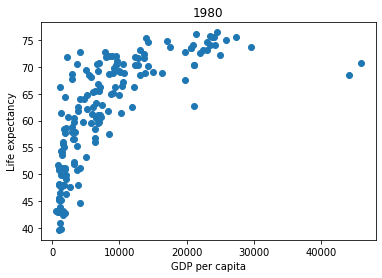

In [280]:
# Adding some labels and a title to the graph
plt.xlabel('GDP per capita')
plt.ylabel('Life expectancy')
plt.title('1980')


# In case we have rows where life expectation OR GDP is missing, we need to remove these.
MergedData = MergedData.dropna() 

# Now, time to scatter 
plt.scatter(MergedData['GDP per capita'], MergedData['Life expectancy at birth (historical)'])



#**B**

**Task**

Which countries have a life expectancy higher than one standard deviation above the mean? 


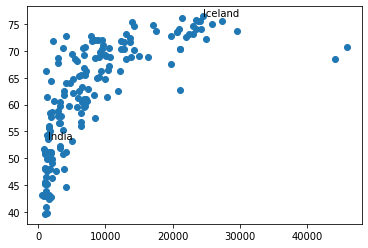

In [281]:
# Now, time to scatter 
plt.scatter(MergedData['GDP per capita'], MergedData['Life expectancy at birth (historical)'])

# Add labels to each dot
#for j in range(len(MergedData)):
 #  plt.annotate(MergedData['Entity'][j], (MergedData['GDP per capita'][j], MergedData['Life expectancy at birth (historical)'][j]))


for j in range(len(MergedData)):
  if (MergedData['Entity'][j] == "Iceland")or (MergedData['Entity'][j] == "India"):
    plt.annotate(MergedData['Entity'][j], (MergedData['GDP per capita'][j], MergedData['Life expectancy at birth (historical)'][j]))
 
  



In [282]:
# Which countries have a life expectancy higher than one standard deviation above the mean? 

# Calculate mean and standard deviation for 1980
lifeExpectedMean = LifeExpectData["Life expectancy at birth (historical)"].mean()
lifeExpectedStd = LifeExpectData["Life expectancy at birth (historical)"].std()

# Sort out countries above mean + standard deviation
HigherThanStdAboveMean = LifeExpectData[LifeExpectData ["Life expectancy at birth (historical)"] > (lifeExpectedMean + lifeExpectedStd)]

# Print values and countries
print ("Mean value:", lifeExpectedMean)
print ("Standard dev:", lifeExpectedStd)
print ("-----------List of countries ----------------")
print (HigherThanStdAboveMean)





Mean value: 62.760000000000005
Standard dev: 9.849707470524287
-----------List of countries ----------------
                      Entity Code  Year  Life expectancy at birth (historical)
473                  Andorra  AND  1980                                   76.8
690      Antigua and Barbuda  ATG  1980                                   73.2
1101               Australia  AUS  1980                                   74.6
1183                 Austria  AUT  1980                                   72.7
1797                 Belgium  BEL  1980                                   73.2
2013                 Bermuda  BMU  1980                                   73.5
3083                  Canada  CAN  1980                                   75.1
3909              Costa Rica  CRI  1980                                   72.9
4136                    Cuba  CUB  1980                                   72.8
4623                 Denmark  DNK  1980                                   74.1
5599          Faeroe I

In [283]:
# What if we do the same on the merged data?

# Calculate mean and standard deviation for 1980
lifeExpectedMean = MergedData["Life expectancy at birth (historical)"].mean()
lifeExpectedStd = MergedData["Life expectancy at birth (historical)"].std()

# Sort out countries above mean + standard deviation
HigherThanStdAboveMean = MergedData[MergedData ["Life expectancy at birth (historical)"] > (lifeExpectedMean + lifeExpectedStd)]

# Print values and countries
print ("Mean value:", lifeExpectedMean)
print ("Standard dev:", lifeExpectedStd)
print ("-----------List of countries ----------------")
print (HigherThanStdAboveMean)


Mean value: 61.85000000000001
Standard dev: 10.16825023705827
-----------List of countries ----------------
             Entity  Life expectancy at birth (historical)  GDP per capita
6         Australia                                   74.6        22972.00
7           Austria                                   72.7        21932.00
13          Belgium                                   73.2        23060.00
24           Canada                                   75.1        25784.00
33       Costa Rica                                   72.9         7828.00
36             Cuba                                   72.8         4106.00
40          Denmark                                   74.1        24272.00
51          Finland                                   73.6        20640.00
52           France                                   74.2        23537.00
56          Germany                                   73.1        22497.00
58           Greece                                   74.6        1

**Comment**

Here we note that when comparing the original dataset and the merged version, we get different mean and Standard deviation. In the lists we note that e.g Andorra is missing in the merged dataset. This is because it was not present in the GDP-dataset, so we get different results.

#**C**

**Task**

Which countries have high life expectancy but have low GDP? 
(note: GDP and not GDP per capita in question c and d) 

Motivate how you have chosen to define “high” and “low”. 



**Approach**

For this we need to get a new dataset with GDP per country: 

`gdp-world-regions-stacked-area.csv`


We will continue to look at 1980.
We need to put names ("Entity") on the dots and perhaps sort them.
We might want to remove the "bastards".
If the graph is not clear enough, we might need to list the countries and evaluate.

**Motivation for high and low**

We start out with a visual approach, assuming that in the upper left quarter we will find interesting countries. 
Therefore, HIGH life expectancy is above 'mean' and LOW GDP is below 'mean'.




In [284]:
# ----- Task C -----
# Import the dataset

file_path_gdpDate = "/content/drive/MyDrive/test/gdp-world-regions-stacked-area.csv"
gdpData = pd.read_csv(file_path_gdpDate)


In [285]:
# We will get too much data. The scatter-plotting will be all blue, so we need to narrow down. We select 1980 only.
gdpData = gdpData[gdpData['Year'] == 1980]
LifeExpectData = LifeExpectData[LifeExpectData['Year'] == 1980]

In [286]:
# Now we need to merge the data-sets and remove what we do not need. We keep Entity (country), Life expectency and GDP.

MergedData = pd.merge(LifeExpectData[['Entity', 'Life expectancy at birth (historical)']], gdpData[['Entity', 'GDP']], on ='Entity')

# Check that the data looks OK.
MergedData.head(5)

,Entity,Life expectancy at birth (historical),GDP
0,Afghanistan,39.6,15329836000
1,Albania,70.5,9993753000
2,Algeria,53.3,94481650000
3,Angola,42.4,10330399000
4,Argentina,68.6,371076960000


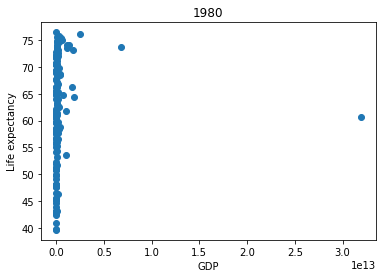

In [287]:
# Adding some labels and a title to the graph
plt.xlabel('GDP')
plt.ylabel('Life expectancy')
plt.title('1980')


# In case we have rows where life expectation OR GDP is missing, we need to remove these.
MergedData = MergedData.dropna() 

# Now, time to scatter 
plt.scatter(MergedData['GDP'], MergedData['Life expectancy at birth (historical)'])

**What we've learned so far** 

We need to put names ("Entity") on the dots and perhaps sort them.

We might want to remove the "bastards".

If the graph is not clear enough, we might need to list the countries and evaluate.

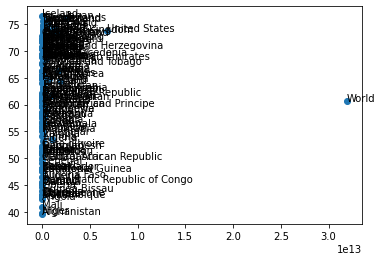

In [288]:

# Plot
plt.scatter(MergedData['GDP'], MergedData['Life expectancy at birth (historical)'])

# Add labels to each dot
for i in range(len(MergedData)):
    plt.annotate(MergedData['Entity'][i], (MergedData['GDP'][i], MergedData['Life expectancy at birth (historical)'][i]))
                            
                              


Now we have labels, and we see that e.g "World" will obscure our data. We might find other aggregated rows, but at this point, we leave it like this for now.

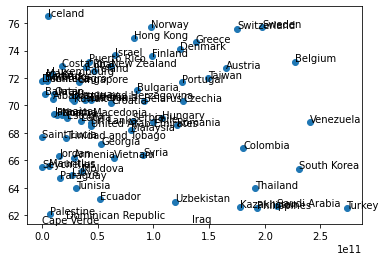

In [289]:
# Need to zoom in on the longest lives and lowest GDP. Focus in upper left (above and under mean)
MergedDataLongest = MergedData[MergedData['Life expectancy at birth (historical)'] >=  MergedData["Life expectancy at birth (historical)"].mean()]
MergedDataLowest = MergedDataLongest[MergedDataLongest['GDP'] <=  MergedDataLongest["GDP"].mean()]

                            
# Plot
plt.scatter(MergedDataLowest['GDP'], MergedDataLowest['Life expectancy at birth (historical)'])

# Add labels to each dot
for j in range(len(MergedData)):
   plt.annotate(MergedData['Entity'][j], (MergedData['GDP'][j], MergedData['Life expectancy at birth (historical)'][j]))
         

**Result**

We can see that nordic countries, Hong Kong, Switzerland and other smaller countries are at the top in this graph. These are the countries with high life expectancy but have low GDP.

#**D**

**Task**

Does every strong economy (normally indicated by GDP) have high life expectancy? 


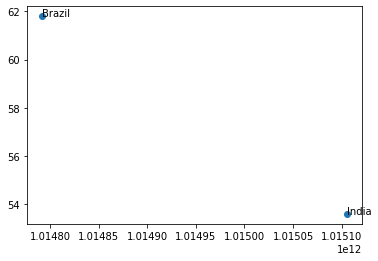

In [290]:
# Need to zoom in on the shortest lives and highest GDP. Focus in lower right.
MergedDataShortest = MergedData[MergedData['Life expectancy at birth (historical)'] <=  MergedData["Life expectancy at birth (historical)"].mean()]
MergedDataHighest = MergedDataShortest[MergedDataShortest['GDP'] >=  MergedDataShortest["GDP"].mean()]

# Need to remove "World" from dataset
MergedDataHighest = MergedDataHighest.drop(MergedDataHighest[MergedDataHighest['Entity'].str.contains('World')].index)

                            
# Plot
plt.scatter(MergedDataHighest['GDP'], MergedDataHighest['Life expectancy at birth (historical)'])

# Add labels to each dot
for j in range(len(MergedData)):
   plt.annotate(MergedData['Entity'][j], (MergedData['GDP'][j], MergedData['Life expectancy at birth (historical)'][j]))

**Result**

Interesting enough, we find India and Brazil having low life expectancy but high GDP, so we conclude:

***It is not enough to have a strong economy to also have high life expectancy.***


#**E**

**Task**


Related to question d, what would happen if you use GDP per capita as an indicator of a strong economy? 

Explain the results you obtained, and discuss any insights you get from comparing the results of d and e.



**Approach**

We compare two graphs (GDP ands GDP per capita) and note how Iceland and India are postitioned in relattion to all other countries in the two graphs

 

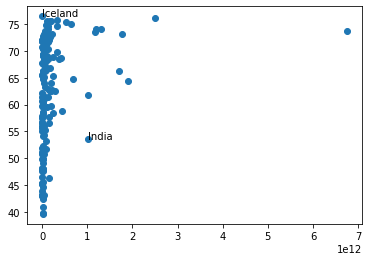

In [291]:
# Scatter data with GDP per country

# Get rid of "World"
MergedData = MergedData.drop(MergedData[MergedData['Entity'].str.contains('World')].index)

# Regenerate the index to avoid error after removing "World"
MergedData.reset_index(drop=True, inplace=True)


plt.scatter(MergedData['GDP'], MergedData['Life expectancy at birth (historical)'])

for j in range(len(MergedData)):
  if (MergedData['Entity'][j] == "Iceland")or (MergedData['Entity'][j] == "India"):
    plt.annotate(MergedData['Entity'][j], (MergedData['GDP'][j], MergedData['Life expectancy at birth (historical)'][j]))
 

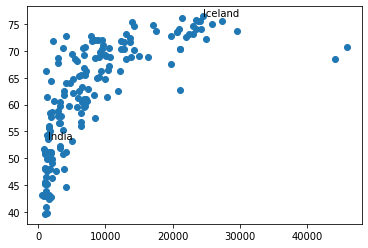

In [292]:
# Scatter data with GDP per capita and per country

MergedDataGDPCapita = pd.merge(LifeExpectData[['Entity', 'Life expectancy at birth (historical)']], gdpDataCapita[['Entity', 'GDP per capita']], on ='Entity')
#MergedDataGDPCapita = MergedDataGDPCapita.drop(MergedDataGDPCapita[MergedDataGDPCapita['Entity'].str.contains('World')].index)

plt.scatter(MergedDataGDPCapita['GDP per capita'], MergedDataGDPCapita['Life expectancy at birth (historical)'])

for j in range(len(MergedDataGDPCapita)):
  if (MergedDataGDPCapita['Entity'][j] == "Iceland")or (MergedDataGDPCapita['Entity'][j] == "India"):
    plt.annotate(MergedDataGDPCapita['Entity'][j], (MergedDataGDPCapita['GDP per capita'][j], MergedDataGDPCapita['Life expectancy at birth (historical)'][j]))
 

As expected, Iceland and India stay at the same hight (Life expectancy). We know that e.g Iceland has a very small population, thus it moves to the right when we use "pre capita". India got a big population, thus moves to the left.
This shows us that using GDP per capita to illustrate if a country has a strong economy, is a pretty good indicator.

**Comparing E and D**

In E we could see that some countries had long life expectency, and that they where rather small in population. And we could see that some other countries, India and Brazil, had huge GDP, but rather low life expectancy. But it was not obvious if GDP could mean high life expectancy.
In D, we understood that GDP per capita was a better indicator.

